In [10]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *

Phi: 160.579280 +/- 1.208899
Theta: -35.916000 or +/- 0.732325
Phi(naive): 172.921000
Theta(naive): 40.913963


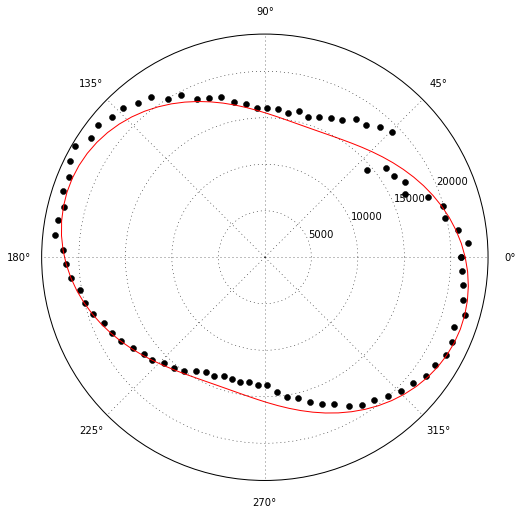

In [2]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\7-11-16\MNP #1 wash 2 on CPW 20mW ODMR scan 14 dot 1 rotor sweep 3')
t[:,1] = t[:,1]-6000
OrientPol(t)

Phi: 250.104271 +/- inf
Theta: 0.000258 or +/- inf
Phi(naive): 152.697000
Theta(naive): 41.283527


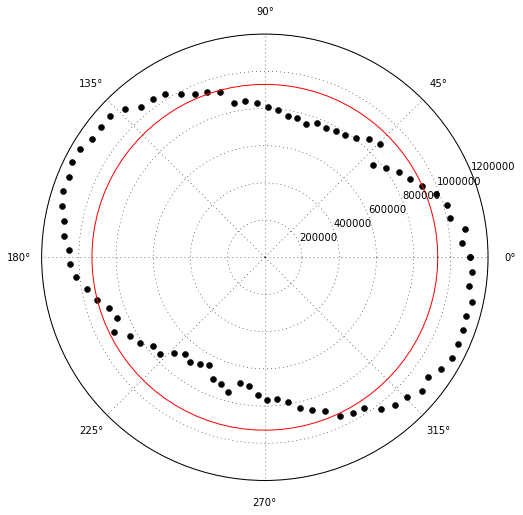

In [9]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\7-11-16\MNP #1 wash 2 on CPW 1mW ODMR scan 14 dot 1 rotor sweep 4')
t[:,1] = t[:,1]-1800
OrientPol(t)

Phi: 99.901346 +/- 0.833827
Theta: 55.172425 or +/- 0.833786
Phi(naive): 100.112000
Theta(naive): 61.512578


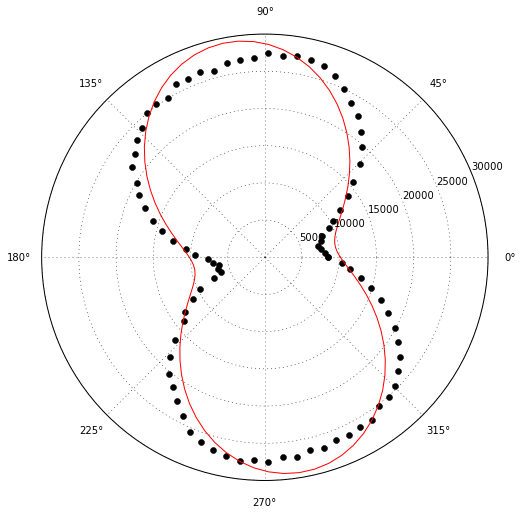

In [8]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP #2 wash CPW 1.5mW scan 2 x4 y131 rotor sweep')
t[:,1] = t[:,1]-2100
OrientPol(t)

Phi: 97.380560 +/- 1.085140
Theta: 50.668375 or +/- 0.956610
Phi(naive): 104.157000
Theta(naive): 59.722789


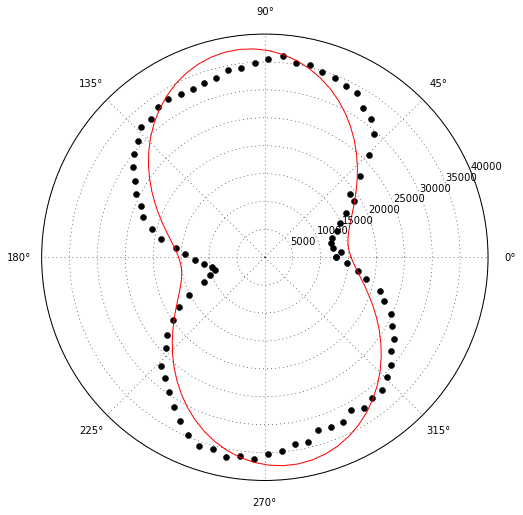

In [9]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP #2 wash CPW 5mW scan 2 x4 y131 rotor sweep')
t[:,1] = t[:,1]-6000
OrientPol(t)

Phi: 103.297893 +/- 0.583693
Theta: 64.955831 or +/- 0.811527
Phi(naive): -73.820000
Theta(naive): 68.346605


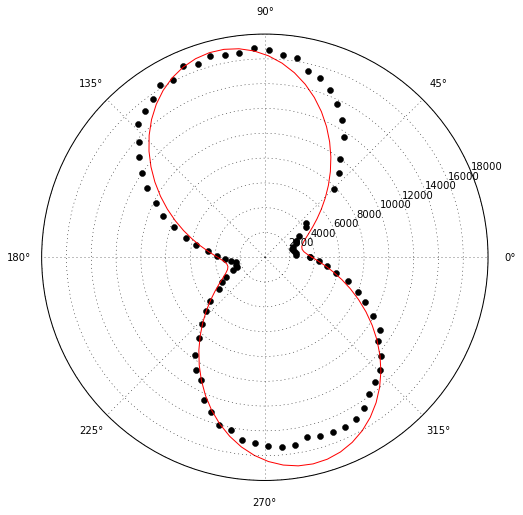

In [15]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP #2 wash CPW 0.4mW scan 2 x4 y131 rotor sweep 4')
t[:,1] = (t[:,1]-1000)
OrientPol(t)

X field: 2.60 +/- 0.02 mT 
Y field: 11.34 +/- 0.01 mT 
Z field: 1.80 +/- 0.02 mT
B: 11.88 +/- 0.03
Phi: 77.08 +/- 0.08
Theta: 78.40 or 101.60


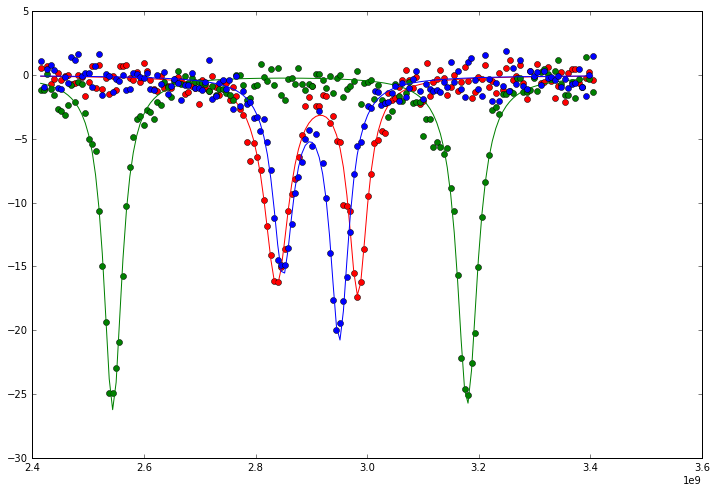

In [10]:
X=np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP #2 wash CPW 5mW scan 2 x4 y131 B0.5V T0')
Y=np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP #2 wash CPW 5mW scan 2 x4 y131 B0.5V T90')
Z=np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP #2 wash CPW 5mW scan 2 x4 y131 B0.5V T0 d15_4')

OrientODMR(X,Y,Z)

In [13]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh import palettes
output_notebook()
TOOLS = "box_zoom,box_select,crosshair,hover,resize,reset"

Loading BokehJS ...

In [1]:
import pandas as pd
import glob
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP #2 wash CPW 5mW scan 2 x4 y131 T-63.2 d_1.55 *V.txt')
output_file("7-12-16 MNP Dot 1 ODMR.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::3]
Bs = np.linspace(0,2.5,len(files))*(11.5/0.5)
p = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[4,0],bsweep[-2,0]],tools=TOOLS)
p.image(image=[diffs],x=Bs[0], y=bsweep[4,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[4,0]], palette='RdPu9')
p.line(Bs,2.864E9+28E6*Bs,line_dash=(6,6),line_color='black')
p.line(Bs,2.864E9-28E6*Bs,line_dash=(6,6),line_color='black')
show(p)

Traceback (most recent call last):
  File "C:\Users\Ouyang Group\Anaconda2\lib\site-packages\IPython\core\ultratb.py", line 1118, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\Ouyang Group\Anaconda2\lib\site-packages\IPython\core\ultratb.py", line 300, in wrapped
    return f(*args, **kwargs)
  File "C:\Users\Ouyang Group\Anaconda2\lib\site-packages\IPython\core\ultratb.py", line 345, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "C:\Users\Ouyang Group\Anaconda2\lib\inspect.py", line 1049, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "C:\Users\Ouyang Group\Anaconda2\lib\inspect.py", line 1009, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "C:\Users\Ouyang Group\Anaconda2\lib\inspect.py", line 454, in getsourcefile
    if hasattr(getmodule(object, filename), '__loader__'):
  File "C:\U

ERROR: Internal Python error in the inspect module.
Below is the traceback from this internal error.


Unfortunately, your original traceback can not be constructed.



IndexError: string index out of range

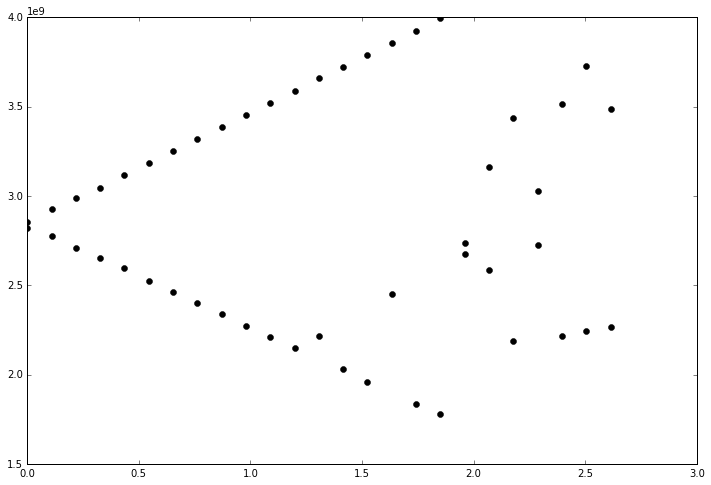

In [20]:
freq = bsweep[:,2]
fits = np.zeros((diffs.shape[1],6))
for i in range(0,diffs.shape[1]):
    O = diffs[:,i]
    opt, cov = curve_fit(ODMRfit,freq,O,p0=(-4E8,freq[np.argmin(O)],1E7,-4E8,2.87E9*2-freq[np.argmin(O)],1E7),maxfev=2500)
    fits[i,:] = opt
    
mask = (fits[:,1]<fits[:,4])
mins = fits[:,1]*mask + fits[:,4]*~mask
maxs = fits[:,1]*~mask + fits[:,4]*mask
plt.plot(Bs*0.5/11,mins,'ko')
plt.plot(Bs*0.5/11,maxs,'ko')

In [18]:
np.savetxt(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP Dot 1 ODMR upper freq.txt'
           ,np.vstack((Bs*0.5/11.5,maxs)).T,fmt='%f',delimiter='\t')

In [21]:
np.savetxt(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP Dot 1 ODMR lower freq.txt'
           ,np.vstack((Bs*0.5/11.5,mins)).T,fmt='%f',delimiter='\t')

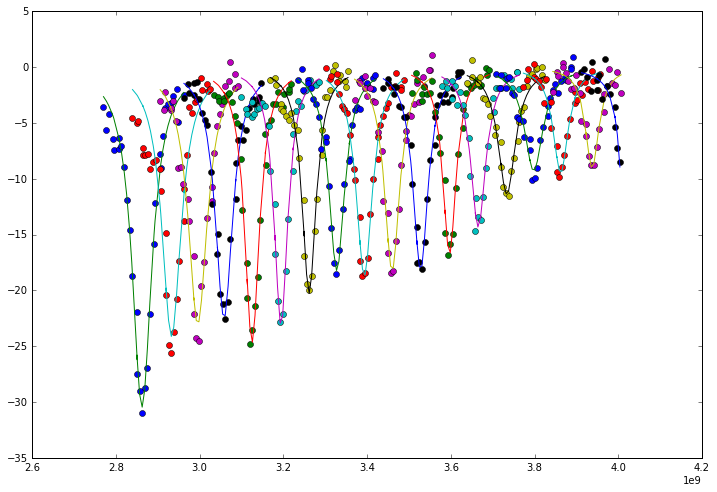

In [19]:
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP #2 wash CPW 5mW scan 2 x4 y131 T-63.2 d_1.55 local upper[0-9].*V ODMR')
res = np.zeros((len(files),2))
reg = re.compile(r'(\d\.\d+) V')
for i,f in enumerate(files):
    o = np.loadtxt(f)
    m = re.search(reg,f)
    opt,cov = curve_fit(lorentzian_2,o[1:,0],o[1:,1],p0=(-4E8,3.6E9,1E7),maxfev=5500)
    res[i,0]=m.group(1)
    res[i,1]=opt[1]
    plt.plot(o[1:,0],o[1:,1],'o')
    plt.plot(o[1:,0],lorentzian_2(o[1:,0],*opt))
    
np.savetxt(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP #2 wash CPW 5mW scan 2 x4 y131 T-63.2 d_1.55 local upper freq fit.txt',res,fmt='%f',delimiter='\t')
    

In [5]:
fits = BatchEpr(r'C:\Users\Ouyang Group\Documents\Data\7-12-16\MNP #2 wash CPW 5mW scan 2 x4 y131 T-63.2 d_1.55 upper Rabi ')

could not fit 0.104167
Optimal parameters not found: The maximum number of function evaluations is exceeded.


NV.py:36: RuntimeWarning: divide by zero encountered in divide
  return a*np.exp(-t/T1)*np.cos(2*np.pi*f*(t+phi))+c
NV.py:36: RuntimeWarning: invalid value encountered in divide
  return a*np.exp(-t/T1)*np.cos(2*np.pi*f*(t+phi))+c


could not fit 0.312500
Optimal parameters not found: The maximum number of function evaluations is exceeded.
could not fit 0.625000
Optimal parameters not found: The maximum number of function evaluations is exceeded.
could not fit 1.250000
Optimal parameters not found: The maximum number of function evaluations is exceeded.
could not fit 1.354167
Optimal parameters not found: The maximum number of function evaluations is exceeded.
could not fit 1.770833
Optimal parameters not found: The maximum number of function evaluations is exceeded.


[  4.80875727e+00   1.45585427e-02   6.18349291e+00   2.08157261e+02
   1.00048120e+02]


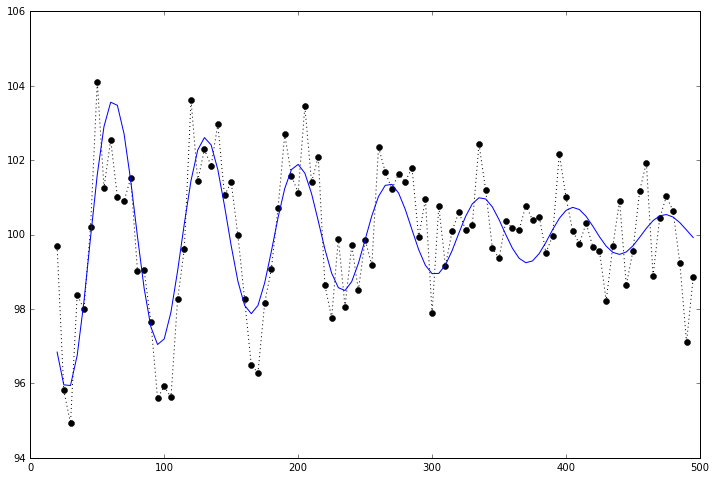

In [46]:
import sys
reload(sys.modules['NV'])

time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\7-13-16\MNP 2 wash on CPW 5mW scan 1 Dot 1 upper Rabi x77 y125 600 sec 0.104167 V  *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\7-13-16\MNP 2 wash on CPW 5mW scan 1 Dot 1 upper Rabi x77 y125 600 sec 0.104167 V   Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
p_0=(15,20E-3,0,2000,100)
bound = ([0,1E-4,-200,100,80],[100,1E-1,200,5E4,150])
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],p0=p_0,bounds=bound,max_nfev=5000)
print opt0
plt.plot(time,rabi0,'ko:')
plt.plot(time,RabiFit(time,*opt0),'b-')

In [7]:
reload(NV)

NameError: name 'NV' is not defined

In [15]:
import sys
reload(sys.modules['NV'])
fits = BatchEpr(r'C:\Users\Ouyang Group\Documents\Data\7-13-16\MNP 2 wash on CPW 5mW scan 1 Dot 1 upper Rabi ')

In [16]:
fits[:,2]

array([ 0.01650347,  0.0145036 ,  0.02205965,  0.01703094,  0.02030789,
        0.01751774,  0.02123282,  0.01934412,  0.02197866,  0.01643925,
        0.0186436 ,  0.01650844,  0.02205386,  0.01384914,  0.01750916,
        0.0199004 ,  0.01866855,  0.01444128])

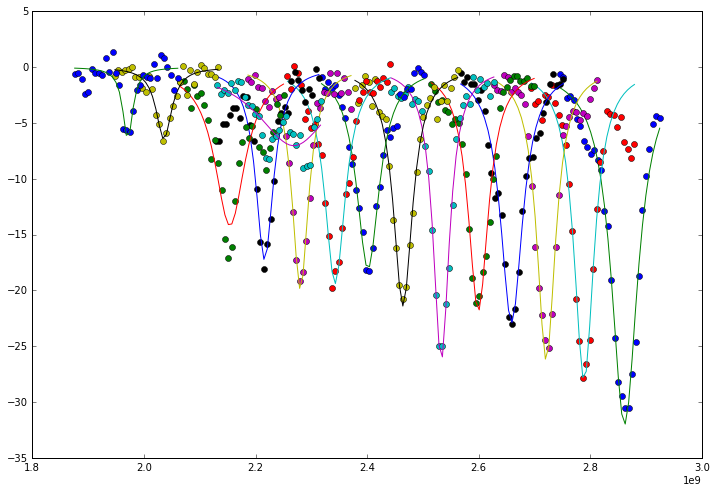

In [23]:
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\7-13-16\MNP 2 wash on CPW 5mW scan 1 Dot 1 lower freq local ODMR[0-9].*V ODMR')
res = np.zeros((len(files),2))
reg = re.compile(r'(\d\.\d+) V')
for i,f in enumerate(files):
    o = np.loadtxt(f)
    m = re.search(reg,f)
    opt,cov = curve_fit(lorentzian_2,o[1:,0],o[1:,1],p0=(-4E8,3.6E9,1E7),maxfev=5500)
    res[i,0]=m.group(1)
    res[i,1]=opt[1]
    plt.plot(o[1:,0],o[1:,1],'o')
    plt.plot(o[1:,0],lorentzian_2(o[1:,0],*opt))
    
np.savetxt(r'C:\Users\Ouyang Group\Documents\Data\7-13-16\MNP 2 wash on CPW 5mW scan 1 Dot 1 lower freq local lower freq fit.txt',res,fmt='%f',delimiter='\t')

In [5]:
import NV
reload(NV)
fits2 = NV.BatchEpr(r'C:\Users\Ouyang Group\Documents\Data\7-13-16\MNP 2 wash on CPW 5mW scan 1 Dot 1 2nd lower Rabi  ')

In [6]:
print fits2[:,2]

[ 0.0149458   0.0185834   0.01249488  0.01559645  0.01274983  0.01631035
  0.02032674  0.01473508  0.01291264  0.01515604  0.01349454  0.01676322
  0.01960372  0.00732586  0.01615767]


[  4.75692078e-01   1.92006356e-02   6.85448742e-01   5.00000000e+04
   1.00010975e+02]


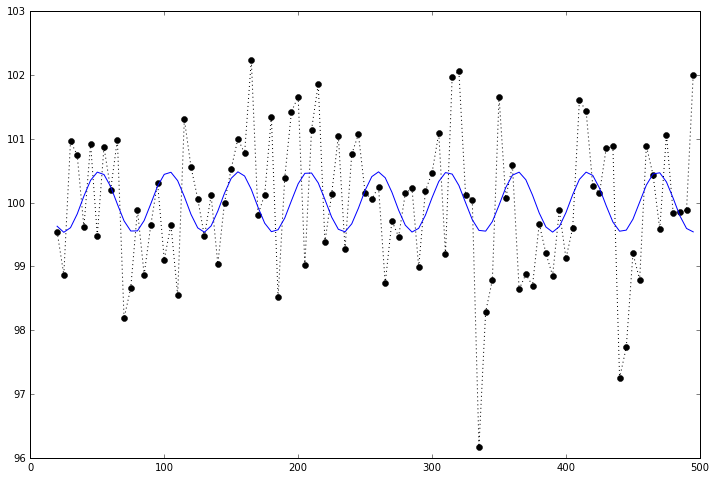

In [11]:
from NV import *
time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\7-14-16\MNP #2 wash on CPW 5mW dot 1 ODMR B0.2V rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\7-14-16\MNP #2 wash on CPW 5mW dot 1 ODMR B0.2V rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
p_0=(15,20E-3,0,2000,100)
bound = ([0,1E-4,-200,100,80],[100,1E-1,200,5E4,150])
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],p0=p_0,bounds=bound,max_nfev=5000)
print opt0
plt.plot(time,rabi0,'ko:')
plt.plot(time,RabiFit(time,*opt0),'b-')

In [19]:
import pandas as pd
import glob
files = glob.glob(r'C:\Users\Ouyang Group\Documents\Data\7-14-16\MNP #2 wash on CPW 5mW dot 1 ODMR ES range *V.txt')
output_file("7-14-16 MNP Dot 1 ES ODMR.html")
bsweep = pd.concat((pd.read_table(f) for f in files),axis=1).values
bsweep = np.nan_to_num(bsweep)
diffs = bsweep[:,1::2]
Bs = np.linspace(0,1,len(files))*(11.5/0.5)
p = figure(x_range=[Bs[0],Bs[-1]], y_range=[bsweep[4,0],bsweep[-2,0]],tools=TOOLS)
p.image(image=[-diffs],x=Bs[0], y=bsweep[4,0], dw=[Bs[-1]], dh=[bsweep[-2,0]-bsweep[4,0]], palette='Spectral11')
p.line(Bs,2.864E9+28E6*Bs,line_dash=(6,6),line_color='black')
p.line(Bs,2.864E9-28E6*Bs,line_dash=(6,6),line_color='black')
show(p)

In [20]:
fits

NameError: name 'fits' is not defined